# Predicting Compressive Strength of Concrete 

## Performed Data Preprocessing, Feature Selection, Model Selection and Hyperparameter Tuning on the dataset

Dataset link : https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set?select=concrete_data.csv 

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 
%matplotlib inline


In [179]:
from pyforest import*

In [180]:
df=pd.read_csv("compresive_strength_concrete+2.csv")

<IPython.core.display.Javascript object>

In [181]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [182]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"superplastic",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarseagg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fineagg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"strength"})

In [183]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [184]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [185]:
df.shape

(1030, 9)

In [186]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [187]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


1. It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.


## Analysis of Attributes

### Cement

In [188]:
#Quartiles
from scipy import stats

Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [189]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers limit in cement: ', L_outliers)
print('Upper outliers limit in cement: ', U_outliers)

Lower outliers limit in cement:  -44.0625
Upper outliers limit in cement:  586.4375


In [190]:
#Checking for presence of outliers with the upper and lower limits

print('Number of outliers in cement upper : ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ',df[df['cement']<-44.0625]['cement'].count())


Number of outliers in cement upper :  0
Number of outliers in cement lower :  0


<IPython.core.display.Javascript object>

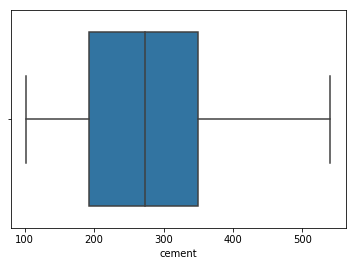

In [191]:
#Distribution of CEMENT

sns.boxplot(x='cement',data=df,orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5,1,'Ash')

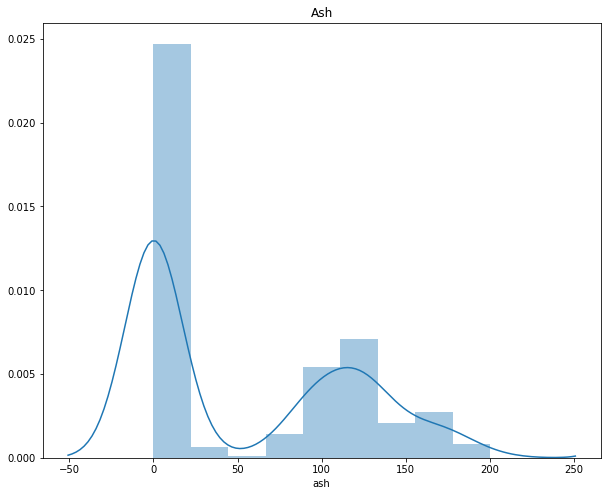

In [192]:
#distplot
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title("Ash")

## Water

From the describe function df.describe():

Minimum water: 121.8

Maximum water: 247.0

Mean value: 181.56728155339803

Median value: 185.0

Standard deviation: 21.354218565032525

Null values: 0

In [193]:
#Quartiles
w_Q1=df['water'].quantile(q=0.25)
w_Q3=df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [194]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)
print('Lower outliers in water: ', WL_outliers)
print('Upper outliers in water: ', WU_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [195]:
#Checking for presence of outliers with the upper and lower limits


print('Number of outliers in water upper : ', df[df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', df[df['water']<124.25]['water'].count())

Number of outliers in water upper :  4
Number of outliers in water lower :  5


<IPython.core.display.Javascript object>

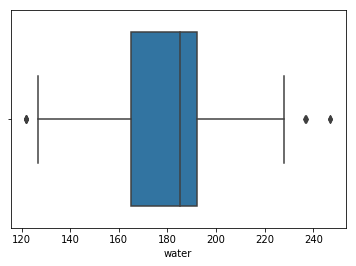

In [196]:
#Distribution of WATER

sns.boxplot(x='water',data=df,orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5,1,'water')

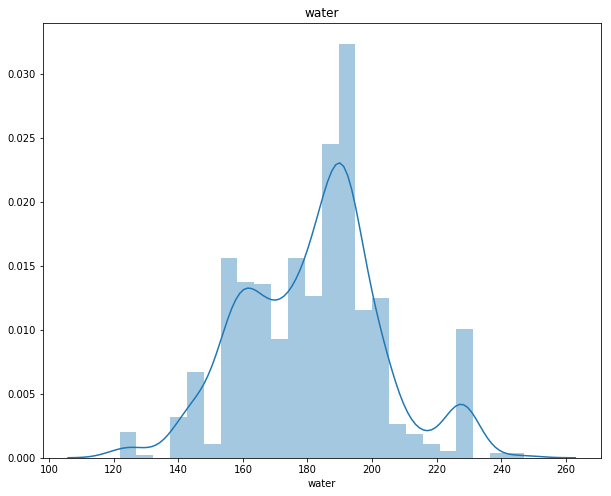

In [197]:
plt.figure(figsize=(10,8))
sns.distplot(df['water']).set_title("water")

## Slag

1st Quartile (Q1) is: 0.0

3st Quartile (Q3) is: 142.95

Interquartile range (IQR) is 142.95

In [198]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)

In [199]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [200]:
print('Number of outliers in slag upper : ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', df[df['slag']<-214.425]['slag'].count())

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0


<IPython.core.display.Javascript object>

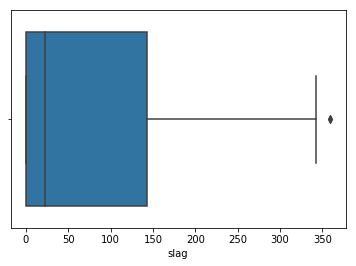

In [201]:
#Distribution of SLAG

sns.boxplot(x='slag',data=df,orient='h')

## Age

Minimum age: 1

Maximum age: 365

Mean value: 45.662135922330094

Median value: 28.0

Standard deviation: 63.169911581033155

Null values: False

In [202]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)

In [203]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)


Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [204]:
print('Number of outliers in age upper : ', df[df['age']> 129.5]['age'].count())
print('Number of outliers in age lower : ', df[df['age']< -66.5]['age'].count())


Number of outliers in age upper :  59
Number of outliers in age lower :  0


<IPython.core.display.Javascript object>

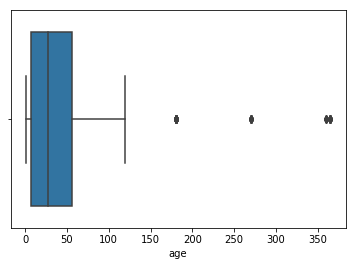

In [205]:
sns.boxplot(x='age',data=df,orient='h')

## Ash

Minimum ash: 0.0

Maximum ash: 200.1

Mean value: 54.18834951456309

Median value: 0.0

Standard deviation: 63.99700415268812



In [206]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)

In [207]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [208]:
print('Number of outliers in ash upper : ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', df[df['ash']<-177.45]['ash'].count())


Number of outliers in ash upper :  0
Number of outliers in ash lower :  0


<IPython.core.display.Javascript object>

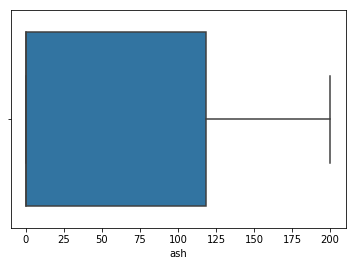

In [209]:
sns.boxplot(x='ash',data=df,orient='h')

## MultiVariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

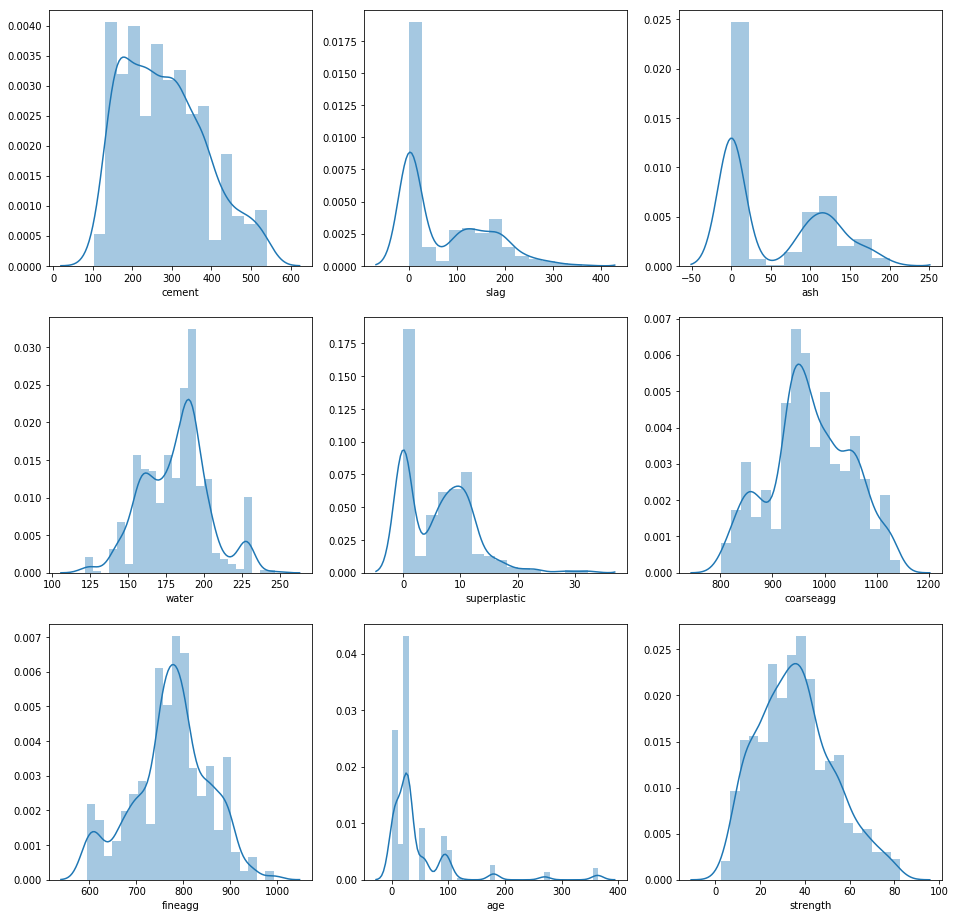

In [210]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

### Observation

### We can observe that :

cement is almost normal.

slag has three gausssians and rightly skewed.

ash has two gaussians and rightly skewed.

water has three guassians and slighly left skewed.

superplastic has two gaussians and rightly skewed.

coarseagg has three guassians and almost normal.

fineagg has almost two guassians and looks like normal.

age has multiple guassians and rightly skewed.

<IPython.core.display.Javascript object>

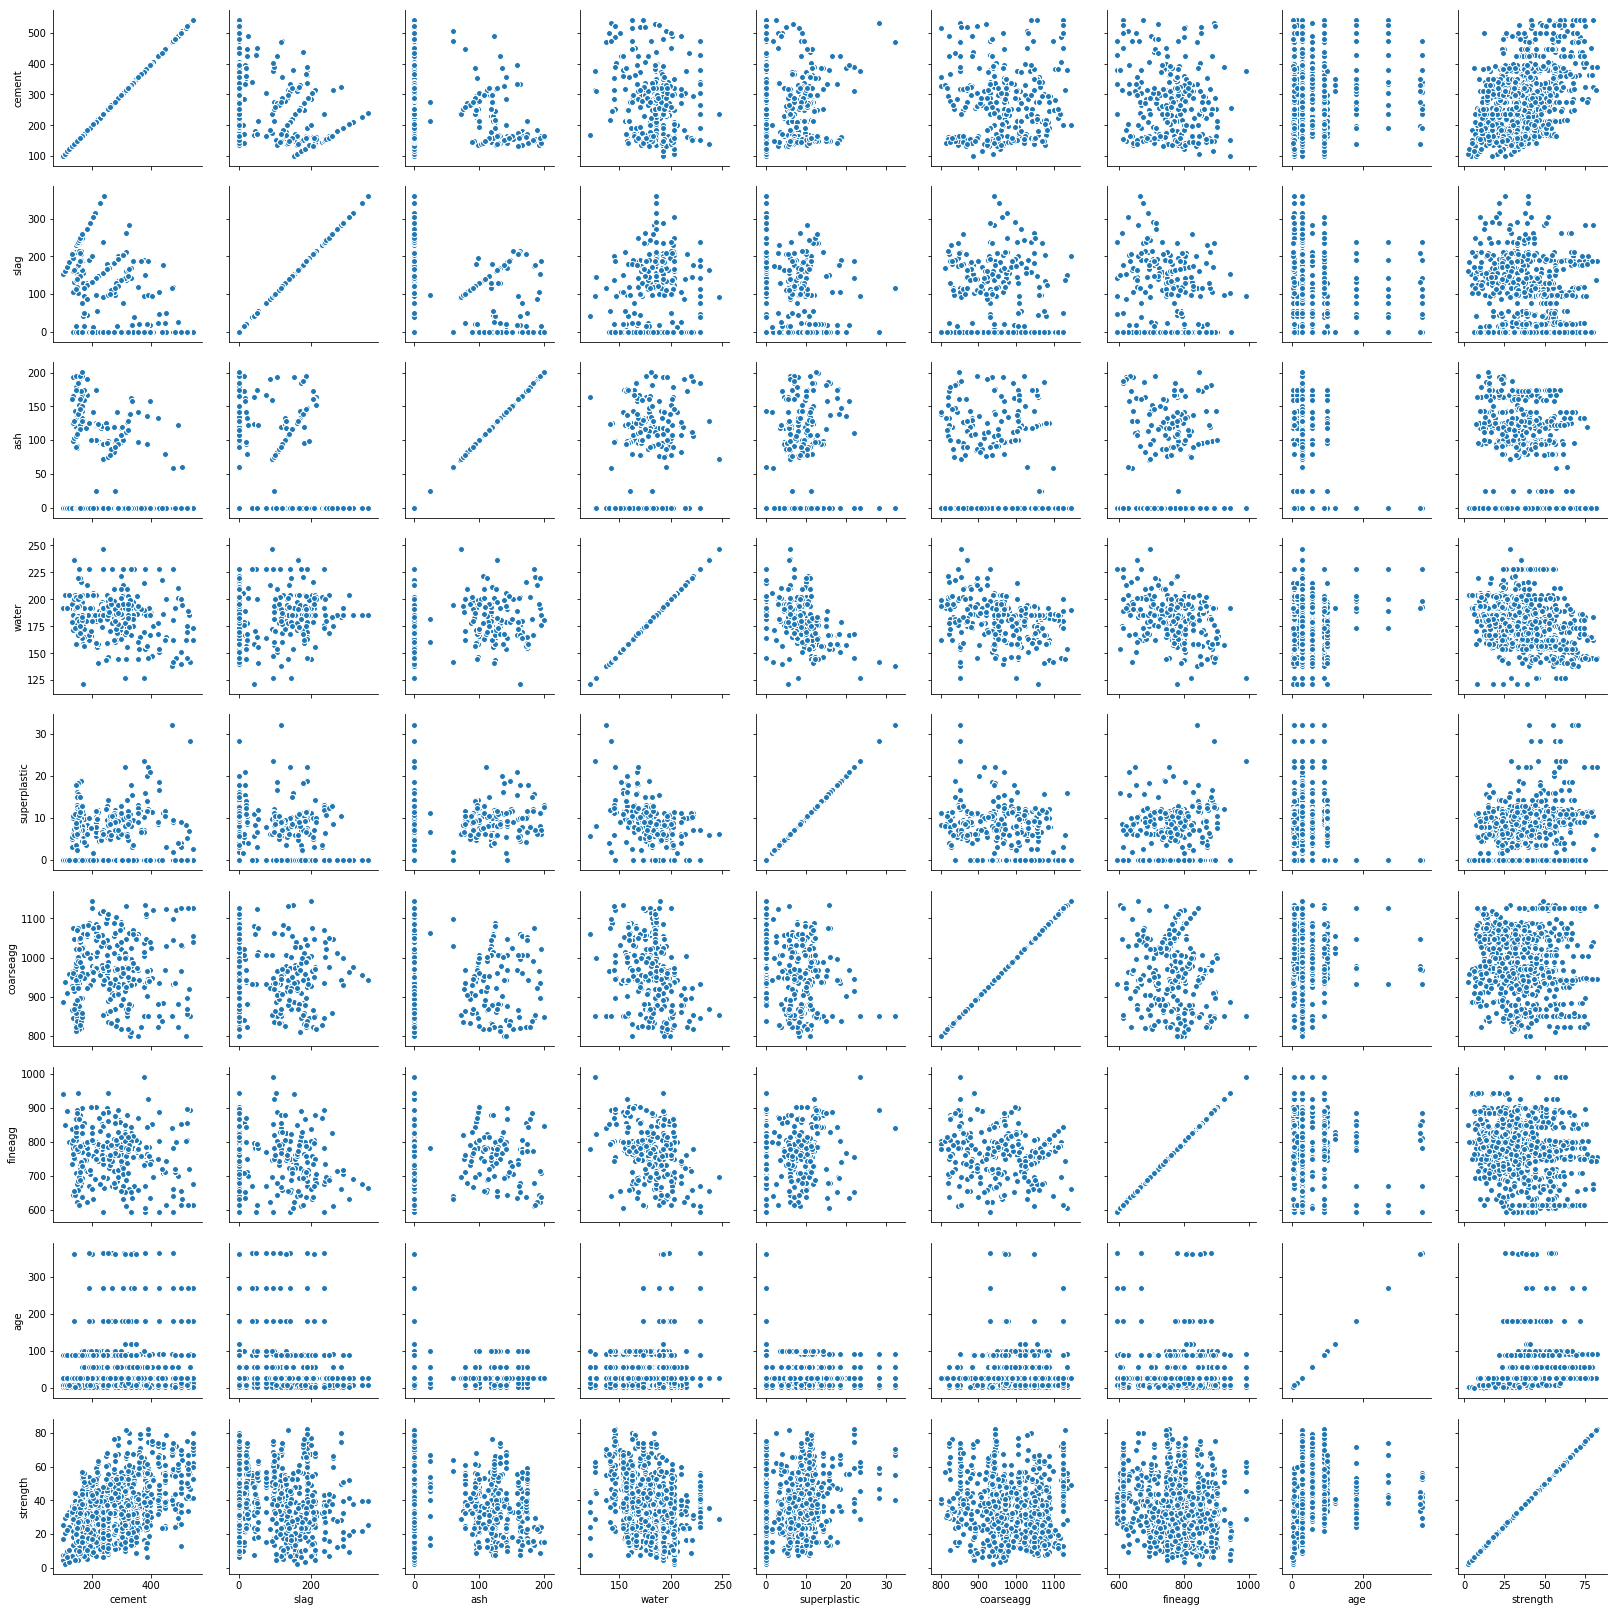

In [211]:
## pairplot- plot density curve instead of histogram in diagonal

sns.pairplot(df, diag_kind=None)


## Correlation between variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

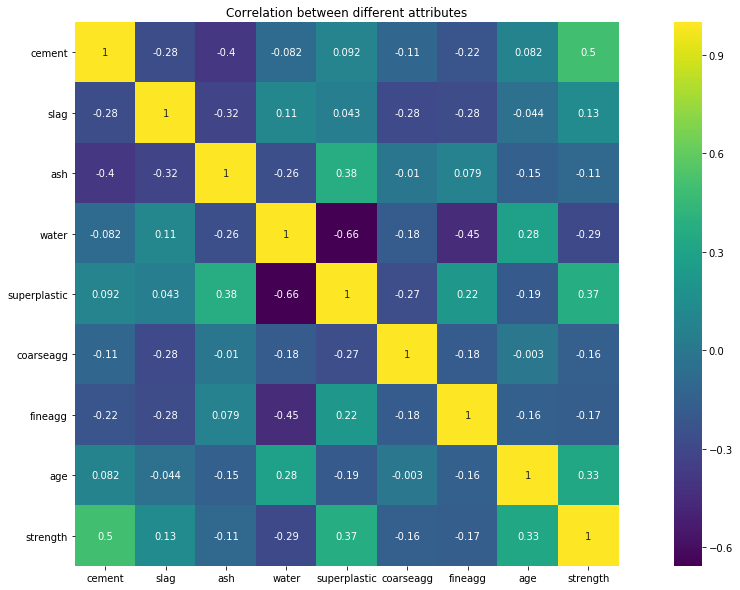

In [212]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

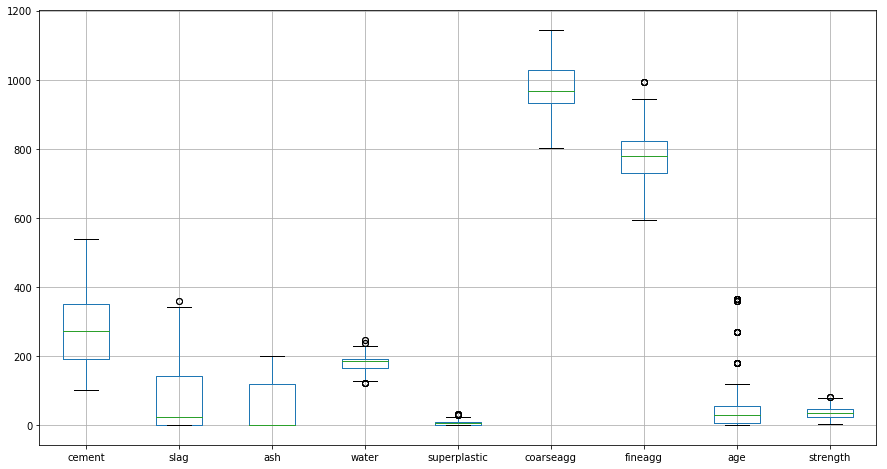

In [213]:
df.boxplot(figsize=(15,8))

## I will be replacing the outliers with median.

In [214]:
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    iqr = Q3 - Q1
    
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

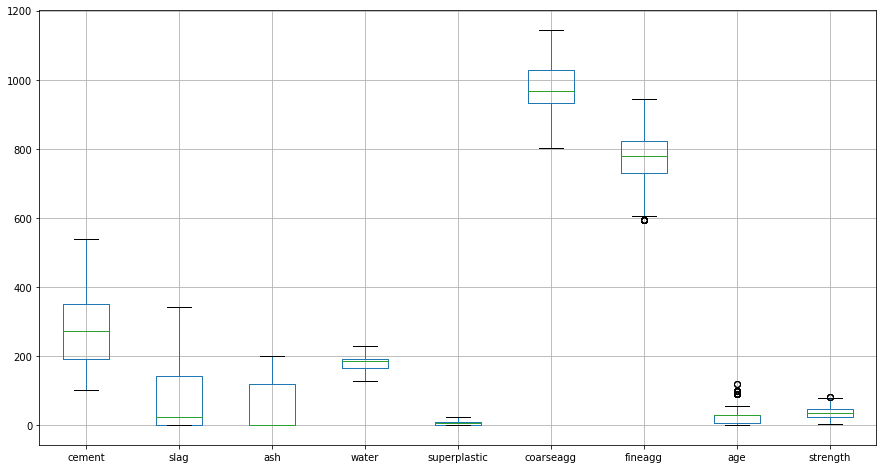

In [215]:
df.boxplot(figsize=(15,8))

now new outliers are formed because there will be change in the IQR after replacing the old outliers with median

## Extracting best features for the model

Benifits of Feature Selection

1. Reduces Overfitting
2. Reduces Training Time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

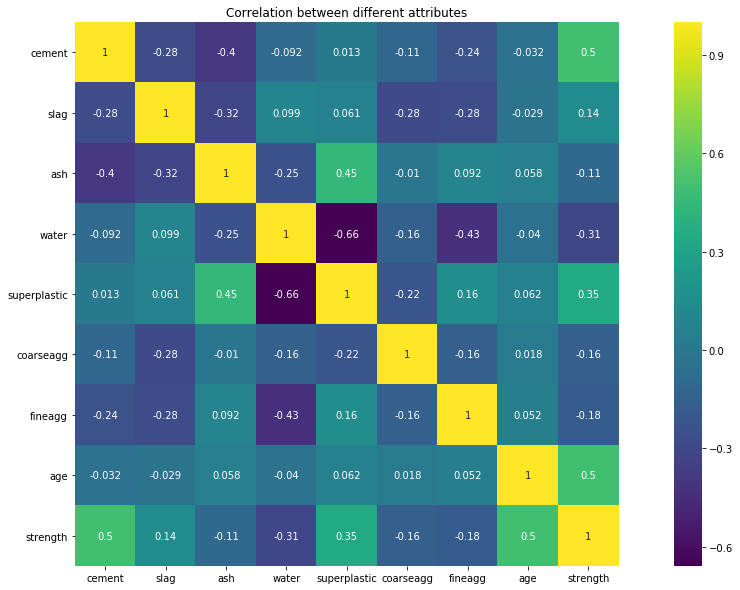

In [216]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()
X=df.iloc[:,:-1]
y=df['strength']


from the matrix I can find out that age,cement are in average correlation with strength and superplastic is somewhat correlated so I will be using these features.

In [217]:
X=df.iloc[:,:-1]
X=X.drop(['water'],axis=1)

## Dividing the dataset into training and testing data

In [219]:
from scipy.stats import zscore

Xscaled =X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

<IPython.core.display.Javascript object>

In [221]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size = 0.3, random_state = 1)

<IPython.core.display.Javascript object>

## Building Different Models

Random Forest

In [222]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [223]:
y_pred = model.predict(X_test)

In [224]:
#Model Performance on Training Data

model.score(X_train,y_train)

0.9712120468417907

In [225]:
#Model Performance on Testing Data
model.score(X_test,y_test)

0.8482873437422819

In [226]:
acc_R=sklearn.metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.8482873437422819

In [227]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

39.76497938659575

In [228]:
#Store the accuracy results for each model in a dataframe for final comparison
results_1 = pd.DataFrame({'Algorithm':['Random Forest'], 'accuracy': acc_R},index={'1'})
results = results_1[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.848287


In [229]:
#Checking for different values of neighbors to determine the best number of neighbors


diff_k=[]
for i in range(1,45):
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    diff_k.append(np.mean(pred_i!=y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0,0.5,'Mean error')

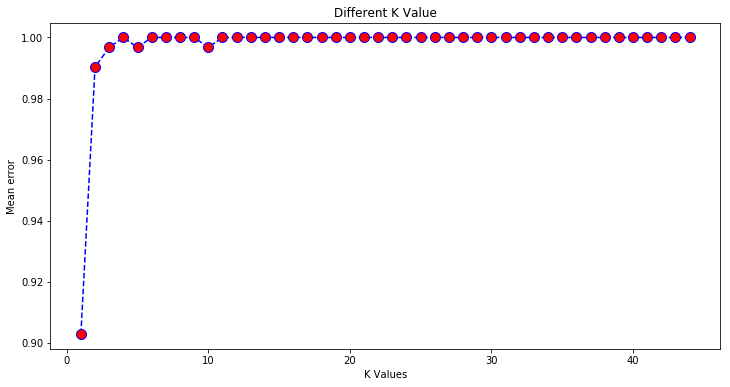

In [230]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Value')
plt.xlabel('K Values')
plt.ylabel('Mean error')

## Finding the best K value

In [231]:
#k=3 is a better choice from the above plot

model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [232]:
y_pred = model.predict(X_test)

In [233]:
model.score(X_train,y_train)


0.9076418491269855

In [234]:
acc_KNN=sklearn.metrics.r2_score(y_test, y_pred)
acc_KNN

<IPython.core.display.Javascript object>

0.7098759672491777

In [235]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

76.04359759079468

In [237]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]},index={'2'})
results = pd.concat([results, KNN_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.848287
7,KNN Regressor,0.709876
2,KNN Regressor,0.709876


## multiple linear regression

In [238]:
from sklearn import linear_model

In [239]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [240]:
y_pred = model.predict(X_test)
model.score(X_train,y_train)


0.7260099872090141

In [241]:
acc_mul=sklearn.metrics.r2_score(y_test, y_pred)
acc_mul

<IPython.core.display.Javascript object>

0.6574564407859965

In [242]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

89.78313284566875

In [243]:
mul_df = pd.DataFrame({'Algorithm':['Multiple Linear Regression'], 'accuracy': [acc_mul]},index={'3'})
results = pd.concat([results, mul_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.848287
7,KNN Regressor,0.709876
2,KNN Regressor,0.709876
3,Multiple Linear Regression,0.657456


## Support Vector Regressor

In [244]:

model = sklearn.svm.SVR(kernel='linear')
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [245]:
y_pred = model.predict(X_test)

In [246]:
model.score(X_train,y_train)


0.7221822269708302

In [247]:
model.score(X_test,y_test)

0.6517414790253292

In [248]:
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

0.6517414790253292

In [249]:
metrics.mean_squared_error(y_test, y_pred)

91.28106546522605

In [250]:
SVR_df = pd.DataFrame({'Algorithm':['Support Vector Regressor'], 'accuracy': [acc_SVR]},index={'4'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.848287
7,KNN Regressor,0.709876
2,KNN Regressor,0.709876
3,Multiple Linear Regression,0.657456
4,Support Vector Regressor,0.651741


## Performing Hyperparameter tuning on random forest because it is having the best accuracy

In [251]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [252]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

rf_random.fit(X_train,y_train)

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [253]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [254]:

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
base_accuracy = evaluate(base_model, X_test,y_test)


best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model Performance


<IPython.core.display.Javascript object>

Average Error: 4.6335 degrees.
Accuracy = 85.71%.


<IPython.core.display.Javascript object>

Model Performance


<IPython.core.display.Javascript object>

Average Error: 4.2103 degrees.
Accuracy = 86.56%.


## Using hyperparameter tuning I am able to get the best accuracy from random forest

## Final Accuracy - 86.56% 

## Best Model for this dataset: Random Forest

